In [1]:
#Importing Libraries
import requests 
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
#Fetching Data from the API
url = 'https://api2.binance.com/api/v3/ticker/24hr'
output = requests.get(url)
data = output.json()

In [3]:
#Putting data into DataFrame
pdframe = pd.DataFrame(data)

In [4]:
#Exploring the Dataset to display the first few rows of the DataFrame
print(pdframe.head(5))

    symbol  priceChange priceChangePercent weightedAvgPrice prevClosePrice  \
0   ETHBTC  -0.00011000             -0.173       0.06336444     0.06353000   
1   LTCBTC   0.00007400              2.352       0.00316184     0.00314500   
2   BNBBTC   0.00017500              2.110       0.00840710     0.00829400   
3   NEOBTC   0.00000460              1.546       0.00030108     0.00029760   
4  QTUMETH   0.00012200              8.834       0.00147790     0.00138100   

    lastPrice     lastQty    bidPrice        bidQty    askPrice  ...  \
0  0.06342000  0.05400000  0.06342000   10.09230000  0.06343000  ...   
1  0.00322000  2.56300000  0.00321900    1.17500000  0.00322000  ...   
2  0.00846800  0.03900000  0.00846700    7.63000000  0.00846800  ...   
3  0.00030210  1.38000000  0.00030200    4.38000000  0.00030240  ...   
4  0.00150300  4.10000000  0.00149700  395.10000000  0.00150400  ...   

    openPrice   highPrice    lowPrice           volume    quoteVolume  \
0  0.06353000  0.06376000

In [5]:
# Check the data types and non-null counts
print(pdframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   symbol              2266 non-null   object
 1   priceChange         2266 non-null   object
 2   priceChangePercent  2266 non-null   object
 3   weightedAvgPrice    2266 non-null   object
 4   prevClosePrice      2266 non-null   object
 5   lastPrice           2266 non-null   object
 6   lastQty             2266 non-null   object
 7   bidPrice            2266 non-null   object
 8   bidQty              2266 non-null   object
 9   askPrice            2266 non-null   object
 10  askQty              2266 non-null   object
 11  openPrice           2266 non-null   object
 12  highPrice           2266 non-null   object
 13  lowPrice            2266 non-null   object
 14  volume              2266 non-null   object
 15  quoteVolume         2266 non-null   object
 16  openTime            2266

In [6]:
# Describe the numerical columns
print(pdframe.describe())

           openTime     closeTime       firstId        lastId         count
count  2.266000e+03  2.266000e+03  2.266000e+03  2.266000e+03  2.266000e+03
mean   1.690338e+12  1.690424e+12  1.535301e+07  1.535962e+07  6.610899e+03
std    6.033393e+08  6.033393e+08  8.458493e+07  8.460839e+07  6.683100e+04
min    1.689574e+12  1.689660e+12 -1.000000e+00 -1.000000e+00  0.000000e+00
25%    1.689574e+12  1.689660e+12 -1.000000e+00 -1.000000e+00  0.000000e+00
50%    1.690815e+12  1.690902e+12  1.540969e+06  1.541607e+06  3.475000e+02
75%    1.690815e+12  1.690902e+12  9.801198e+06  9.803093e+06  2.404000e+03
max    1.690815e+12  1.690902e+12  3.182033e+09  3.182732e+09  2.952090e+06


## Data Cleaning and Transformation 

In [7]:
#making the timestamp more readable
pdframe['timestamp'] = pd.to_datetime(pdframe['closeTime'], unit='ms')

In [8]:
print(pdframe.head(5))

    symbol  priceChange priceChangePercent weightedAvgPrice prevClosePrice  \
0   ETHBTC  -0.00011000             -0.173       0.06336444     0.06353000   
1   LTCBTC   0.00007400              2.352       0.00316184     0.00314500   
2   BNBBTC   0.00017500              2.110       0.00840710     0.00829400   
3   NEOBTC   0.00000460              1.546       0.00030108     0.00029760   
4  QTUMETH   0.00012200              8.834       0.00147790     0.00138100   

    lastPrice     lastQty    bidPrice        bidQty    askPrice  ...  \
0  0.06342000  0.05400000  0.06342000   10.09230000  0.06343000  ...   
1  0.00322000  2.56300000  0.00321900    1.17500000  0.00322000  ...   
2  0.00846800  0.03900000  0.00846700    7.63000000  0.00846800  ...   
3  0.00030210  1.38000000  0.00030200    4.38000000  0.00030240  ...   
4  0.00150300  4.10000000  0.00149700  395.10000000  0.00150400  ...   

    highPrice    lowPrice           volume    quoteVolume       openTime  \
0  0.06376000  0.06299

In [9]:
#Converting numeric strings to numeric values
numeric_cols = ['lastPrice', 'bidPrice', 'askPrice', 'highPrice', 'lowPrice', 'volume', 'quoteVolume']
pdframe[numeric_cols] = pdframe[numeric_cols].apply(pd.to_numeric)


In [10]:
print(pdframe.head(5))

    symbol  priceChange priceChangePercent weightedAvgPrice prevClosePrice  \
0   ETHBTC  -0.00011000             -0.173       0.06336444     0.06353000   
1   LTCBTC   0.00007400              2.352       0.00316184     0.00314500   
2   BNBBTC   0.00017500              2.110       0.00840710     0.00829400   
3   NEOBTC   0.00000460              1.546       0.00030108     0.00029760   
4  QTUMETH   0.00012200              8.834       0.00147790     0.00138100   

   lastPrice     lastQty  bidPrice        bidQty  askPrice  ... highPrice  \
0   0.063420  0.05400000  0.063420   10.09230000  0.063430  ...  0.063760   
1   0.003220  2.56300000  0.003219    1.17500000  0.003220  ...  0.003257   
2   0.008468  0.03900000  0.008467    7.63000000  0.008468  ...  0.008513   
3   0.000302  1.38000000  0.000302    4.38000000  0.000302  ...  0.000310   
4   0.001503  4.10000000  0.001497  395.10000000  0.001504  ...  0.001516   

   lowPrice       volume  quoteVolume       openTime      closeTime 

## Performing Analysis

In [11]:
#The trading pair with the highest 24-hour volume
max_volume_pair = pdframe.loc[pdframe['volume'].idxmax(), 'symbol']
print(f"The trading pair with the highest 24-hour volume is {max_volume_pair}.")

The trading pair with the highest 24-hour volume is PEPEUSDT.


In [12]:
#Calculating the average price change percentage for all trading pairs
pdframe['priceChangePercent'] = pdframe['priceChangePercent'].astype(float)
average_percentage_price_change = pdframe['priceChangePercent'].mean()
print(f"The average percentage change in price for all trading pairs is {average_percentage_price_change:.2f}%.")

The average percentage change in price for all trading pairs is -0.74%.


In [13]:
#Top Trading Pairs by 24-hour Volume
top_5_pairs = pdframe.nlargest(5, 'volume')[['symbol', 'volume']]
print("Top 5 Trading Pairs by 24-hour Volume:")
print(top_5_pairs)

Top 5 Trading Pairs by 24-hour Volume:
        symbol        volume
2213  PEPEUSDT  1.655378e+13
2218   PEPETRY  4.971614e+12
1419  SHIBUSDT  3.498777e+12
1420  SHIBBUSD  4.963891e+11
1908  BTTCUSDT  3.651625e+11


In [14]:
#Percantage change of the Highest and Lowest 24-hour Price

highest_pr_change_pair = pdframe.nlargest(1, 'priceChangePercent')[['symbol', 'priceChangePercent']]
lowest_pr_change_pair = pdframe.nsmallest(1, 'priceChangePercent')[['symbol', 'priceChangePercent']]

print(f"Highest 24-hour Price Change Percentage: {highest_pr_change_pair.iloc[0]['priceChangePercent']:.2f}% for {highest_pr_change_pair.iloc[0]['symbol']}")
print(f"Lowest 24-hour Price Change Percentage: {lowest_pr_change_pair.iloc[0]['priceChangePercent']:.2f}% for {lowest_pr_change_pair.iloc[0]['symbol']}")


Highest 24-hour Price Change Percentage: 37.73% for ALPACABTC
Lowest 24-hour Price Change Percentage: -11.25% for COMPTUSD


In [15]:
#Average and Median 24-hour Trading Volume
avg_vol = pdframe['volume'].mean()
median_vol = pdframe['volume'].median()

print(f"Average 24-hour Trading Volume is: {avg_vol:.2f}")
print(f"Median 24-hour Trading Volume is: {median_vol:.2f}")

Average 24-hour Trading Volume is: 12013310924.89
Median 24-hour Trading Volume is: 18620.35


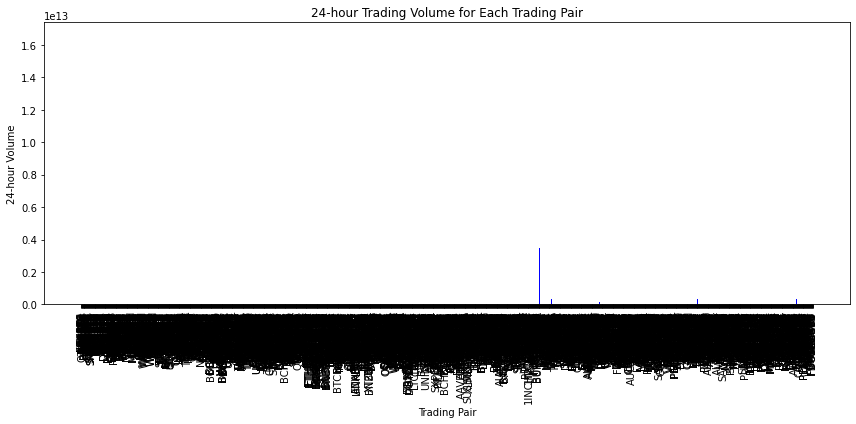

In [18]:
#Plot a bar chart to visualize the 24-hour trading volume for each trading pair
plt.figure(figsize=(12, 6))
plt.bar(pdframe['symbol'], pdframe['volume'], color='b')
plt.xlabel('Trading Pair')
plt.ylabel('24-hour Volume')
plt.title('24-hour Trading Volume for Each Trading Pair')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

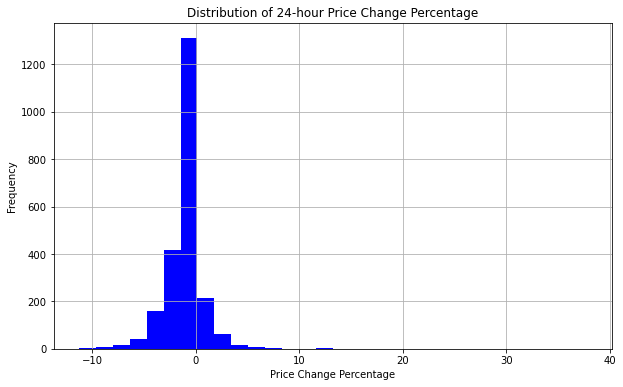

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(pdframe['priceChangePercent'], bins=30, color='blue')
plt.xlabel('Price Change Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of 24-hour Price Change Percentage')
plt.grid(True)
plt.show()

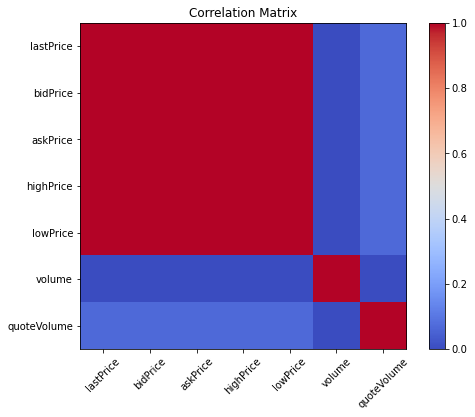

In [21]:
numeric_columns = ['lastPrice', 'bidPrice', 'askPrice', 'highPrice', 'lowPrice', 'volume', 'quoteVolume']
correlation_matrix = pdframe[numeric_columns].corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=45)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.title('Correlation Matrix')
plt.show()

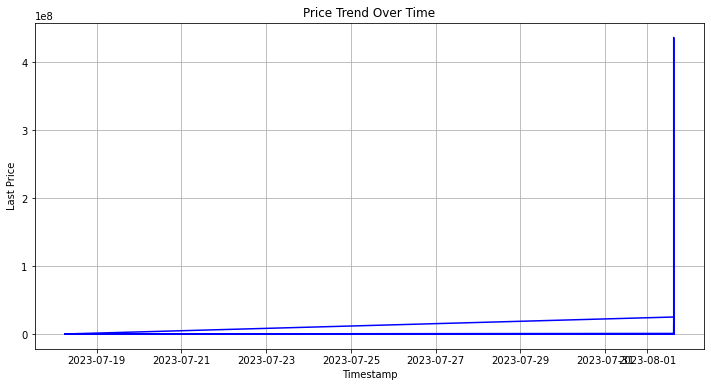

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(pdframe['timestamp'], pdframe['lastPrice'], color='b')
plt.xlabel('Timestamp')
plt.ylabel('Last Price')
plt.title('Price Trend Over Time')
plt.grid(True)
plt.show()